In [ ]:
# 코랩에서 할경우 로컬에서 할건지 여기서 할건지 결정해야 함
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib
# Colab 런타임 다시 시작

In [ ]:
!pip install konlpy > /dev/null

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib 
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

# 한글 텍스트 전처리

In [ ]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요'

In [ ]:
from konlpy.tag import Okt, Kkma, Komoran

In [ ]:
okt = Okt() # open korean test
kkma = Kkma() # 꼬꼬마
kr = Komoran() #코모란 

## 형태소 분석기

In [ ]:
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요']


## 품사 태깅

In [ ]:
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VV'), ('세요', 'EFN')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EC')]


## 명사추출

In [ ]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


# 데이터 파일 읽고 전처리

In [ ]:
from google.colab import files
up = files.upload()

Saving new_gift.txt to new_gift.txt


In [ ]:
with open('new_gift.txt') as file:
    text = file.read()

In [ ]:
#명사추출
tokens = okt.nouns(text)

In [ ]:
tokens[:5]

['혹시', '여친', '생리통', '여친', '선물']

In [ ]:
#영문자, 숫자, 부호 제거
import re
tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

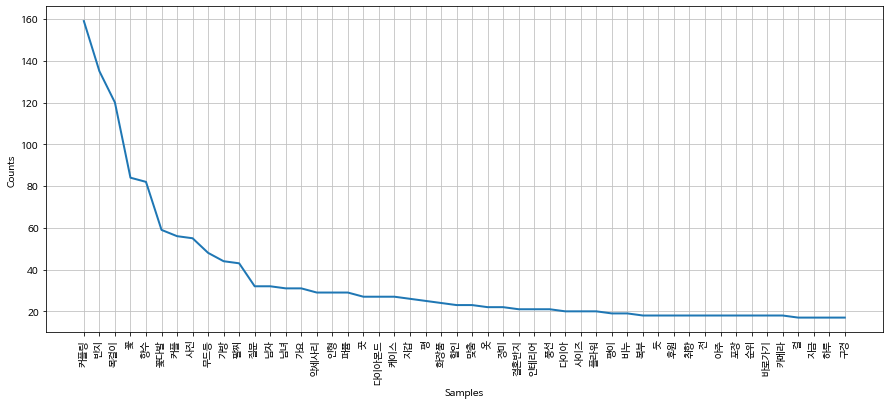

In [ ]:
gift = nltk.Text(tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [ ]:
stoptext = """선물 추천 후기 수 제품 여자친구 확인 가격 것 저 수수료 스 활동 여자 이 제 브랜드 여친 제공 생일 때 구매
배송 제작 생각 링크 더 채택 답변 인기 참고 분 한번 의미 디자인 파트너 상품 준 개 가능 여성 정액 가성 요 비 거 도움 향 네이버 등 마감
하트 친구 고급 동해 용 주문 위 사용 세트 기념일 변경 쿠팡 기념일 변경 안쪽 정말 종 각인 판매 블로그 감동 정도 고민 처리 아래 요즘 끝 날 그냥 하나 
이니셜 일환 마음 드라마 협찬 무광 가장 조금 보통 유광 펌 기부 끗 티 링 부담 핸드 중 통해 가지 미만 이면 직접 구성 스토어 너 도 시 은 몇개 크림 해 사랑
여기 로티 사이트 사람 팽이 준비 다른 몇개 포스팅 블라썸 심플 자 여기
"""

In [ ]:
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]
tokens[:10]

['혹시', '생리통', '복부', '열기', '생리통', '이번', '남자친구', '복부', '열기', '뭔가']

## 워드 클라우드 그리기

In [ ]:
from wordcloud import WordCloud
from PIL import Image

In [ ]:
data = gift.vocab().most_common(300)
wc = WordCloud(font_path='NanumBarunGothic', relative_scaling=0.2,
               background_color='white').generate_from_frequencies(dict(data))

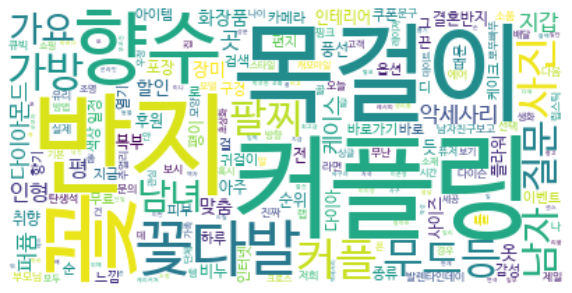

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()